<a href="https://colab.research.google.com/github/harperd17/energy_volatility_prediction/blob/main/notebooks/EDA/SUSB_EDA_2001_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Goal - to determine what feature would be the best to predict electric accounts for 2001 - 2008 for COM and IND.  

**Employment Count** was chosen

In [1]:
from google.colab import drive

drive.mount('./drive/')

%cd drive/Shareddrives/Data606_Energy/

Mounted at ./drive/
/content/drive/Shareddrives/Data606_Energy


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
df_complete = pd.read_csv('data/fill_ready/SUSB_data_all_2001_2018.csv')

In [4]:
df_complete.isnull().sum()

STATE                           0
DESCRIPTION                     0
YEAR                            0
Employment                    222
Establishments                  0
Firms                           0
Description_Lemma_Lower         0
Description_Lower               0
Classification_Lower            0
Classification_Lemma_Lower      0
dtype: int64

In [5]:
df_complete

,STATE,DESCRIPTION,YEAR,Employment,Establishments,Firms,Description_Lemma_Lower,Description_Lower,Classification_Lower,Classification_Lemma_Lower
0,AL,Accommodation & foodservices,2001,127776.0,6870.0,4697.0,accommodation & foodservice,accommodation & foodservices,COM,COM
1,AL,Accommodation & foodservices,2002,128964.0,7070.0,4801.0,accommodation & foodservice,accommodation & foodservices,COM,COM
2,AL,Accommodation and Food Services,2003,139440.0,7178.0,4918.0,accommodation and food services,accommodation and food services,COM,COM
3,AL,Accommodation and Food Services,2004,141442.0,7292.0,5089.0,accommodation and food services,accommodation and food services,COM,COM
4,AL,Accommodation and Food Services,2005,145447.0,7529.0,5256.0,accommodation and food services,accommodation and food services,COM,COM
...,...,...,...,...,...,...,...,...,...,...
185892,WY,Political Organizations,2018,34.0,13.0,13.0,political organization,political organizations,OTH,OTH
185893,WY,Political Organizations,2018,34.0,13.0,13.0,political organization,political organizations,OTH,OTH
185894,WY,"Other Similar Organizations (except Business, ...",2018,70.0,18.0,18.0,"other similar organization ( except business ,...","other similar organizations (except business, ...",COM,COM
185895,WY,"Other Similar Organizations (except Business, ...",2018,70.0,18.0,18.0,"other similar organization ( except business ,...","other similar organizations (except business, ...",COM,COM


## Classification Tagging

In [6]:
df_complete

,STATE,DESCRIPTION,YEAR,Employment,Establishments,Firms,Description_Lemma_Lower,Description_Lower,Classification_Lower,Classification_Lemma_Lower
0,AL,Accommodation & foodservices,2001,127776.0,6870.0,4697.0,accommodation & foodservice,accommodation & foodservices,COM,COM
1,AL,Accommodation & foodservices,2002,128964.0,7070.0,4801.0,accommodation & foodservice,accommodation & foodservices,COM,COM
2,AL,Accommodation and Food Services,2003,139440.0,7178.0,4918.0,accommodation and food services,accommodation and food services,COM,COM
3,AL,Accommodation and Food Services,2004,141442.0,7292.0,5089.0,accommodation and food services,accommodation and food services,COM,COM
4,AL,Accommodation and Food Services,2005,145447.0,7529.0,5256.0,accommodation and food services,accommodation and food services,COM,COM
...,...,...,...,...,...,...,...,...,...,...
185892,WY,Political Organizations,2018,34.0,13.0,13.0,political organization,political organizations,OTH,OTH
185893,WY,Political Organizations,2018,34.0,13.0,13.0,political organization,political organizations,OTH,OTH
185894,WY,"Other Similar Organizations (except Business, ...",2018,70.0,18.0,18.0,"other similar organization ( except business ,...","other similar organizations (except business, ...",COM,COM
185895,WY,"Other Similar Organizations (except Business, ...",2018,70.0,18.0,18.0,"other similar organization ( except business ,...","other similar organizations (except business, ...",COM,COM


In [7]:
# Words to classification description as IND
industry_tokens = ["mining","mill","manufacture","industrial","material","chemical","part","unit","machine","manufacturing"
                    ,"fuel","water","electric","generate","quarry","industrial","facil","equipment","metal","freight"
                ]


# Words to classification description as COM
commerical_tokens = ["service","sale","admin","office","wholesaler","financ"
                    ,"store","clothing","support","salon","broadcast","intermediat","agency","dealer"
                    ,"appraiser","telecommunication","sell","bank","repair","school","commercial","merchandise", "professional"
                    ,"advertis","publisher","agency","contractor","research","real","estate","social","markets","information","insurance","trade"
                    ,"hospitals","rental","construction"]

In [8]:
tokens = [{"IND":industry_tokens,
 "COM":commerical_tokens}]

df = pd.DataFrame(tokens).T.reset_index().rename(columns={"index":"Classification",0:"tokens"}).explode("tokens")

df["count"] = 1

In [9]:
# first do a group by year for a sanity check
year_grouped = df_complete[(df_complete['Classification_Lower']=='COM')&(df_complete['YEAR']<2017)].groupby(by='YEAR').sum()

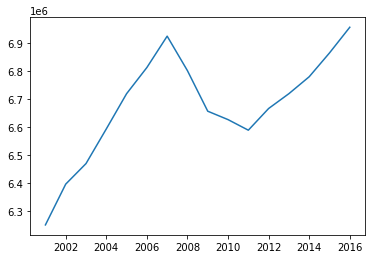

In [10]:
_ = plt.plot(year_grouped['Establishments'])

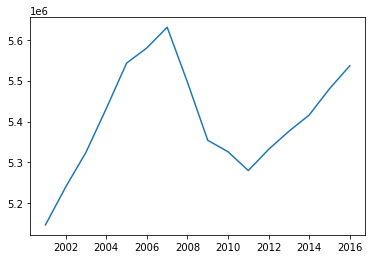

In [11]:
_ = plt.plot(year_grouped['Firms'])

In [12]:
# these look very correlated. Let's see exactly how much
df_complete[['Establishments','Firms']].corr()

,Establishments,Firms
Establishments,1.000000,0.998053
Firms,0.998053,1.000000


Due to this high correlation, when using this in the regression model, we should use either establishments or firms, but not both.

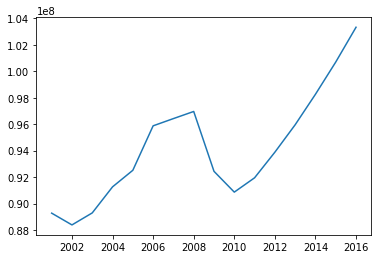

In [13]:
_ = plt.plot(year_grouped['Employment'])

# Industrial Classification

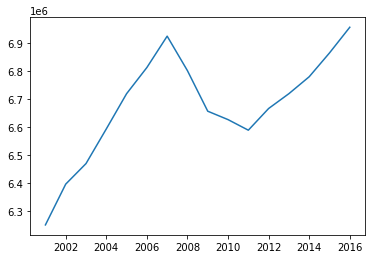

In [14]:
_ = plt.plot(year_grouped['Establishments'])

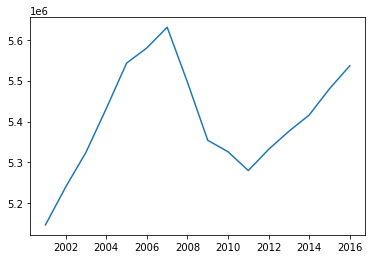

In [15]:
_= plt.plot(year_grouped['Firms'])